In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [9]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [13]:
df.info()
#no null value as shown...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [17]:
categorical_features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

In [19]:
label_encoder = LabelEncoder()

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [21]:
for col in categorical_features:
    print(df[col].unique())      # numerical values for each categorical data e.g 0 for male , 1 for female

[0 1]
[4 3 1 0 2]
[3 2 0 1]
[4 1 3 5 2 0]
[0 1]


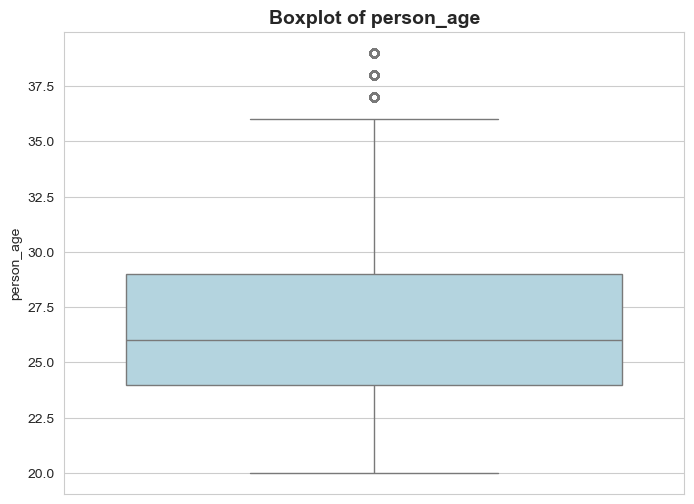

Skipping non-numeric column: person_gender


<Figure size 800x600 with 0 Axes>

Skipping non-numeric column: person_education


<Figure size 800x600 with 0 Axes>

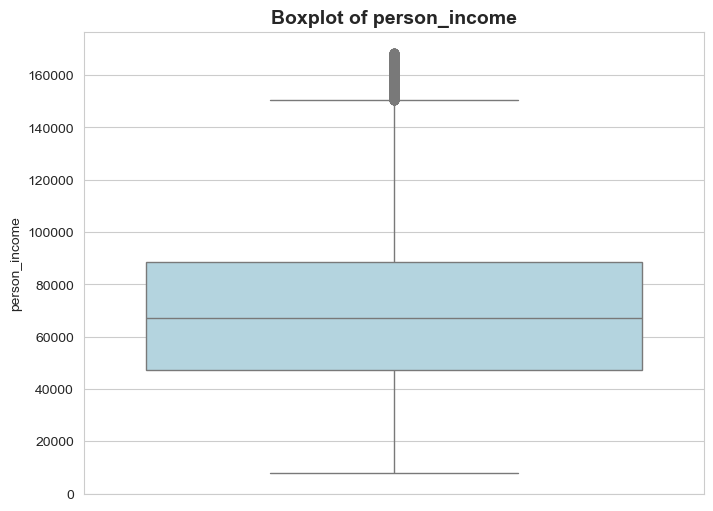

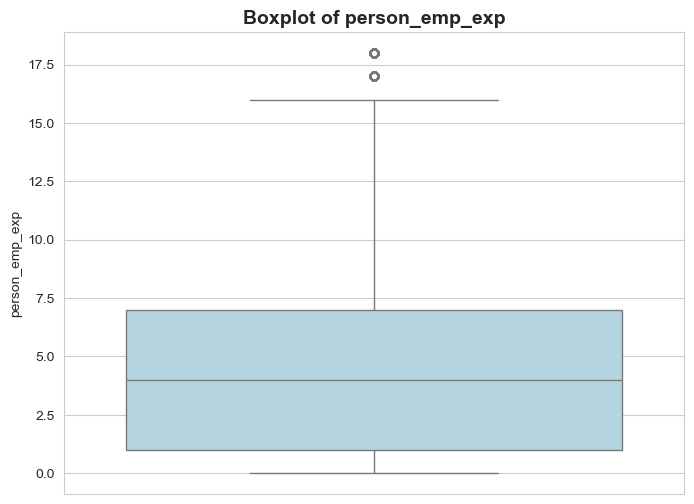

Skipping non-numeric column: person_home_ownership


<Figure size 800x600 with 0 Axes>

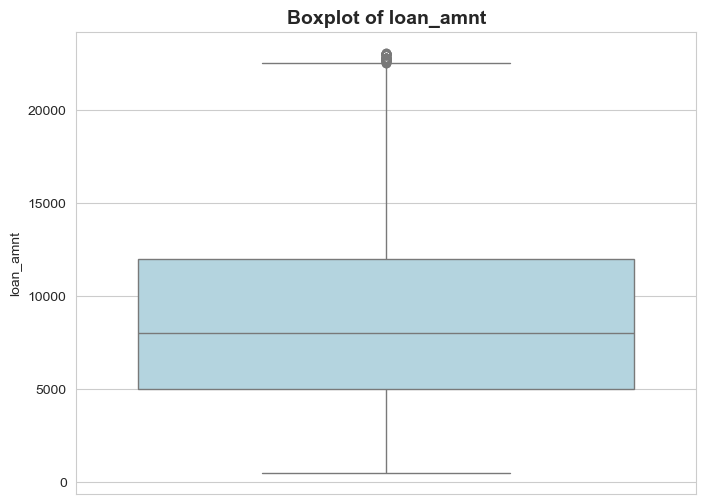

Skipping non-numeric column: loan_intent


<Figure size 800x600 with 0 Axes>

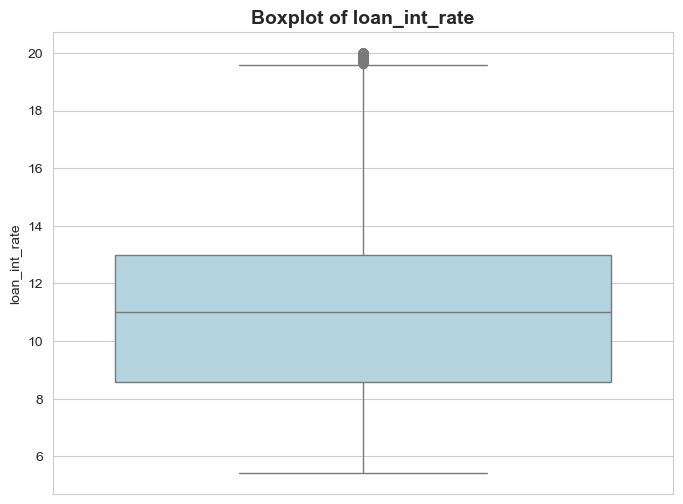

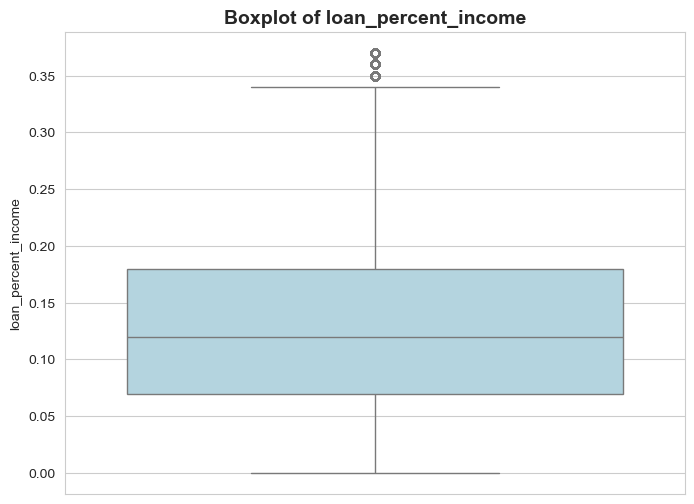

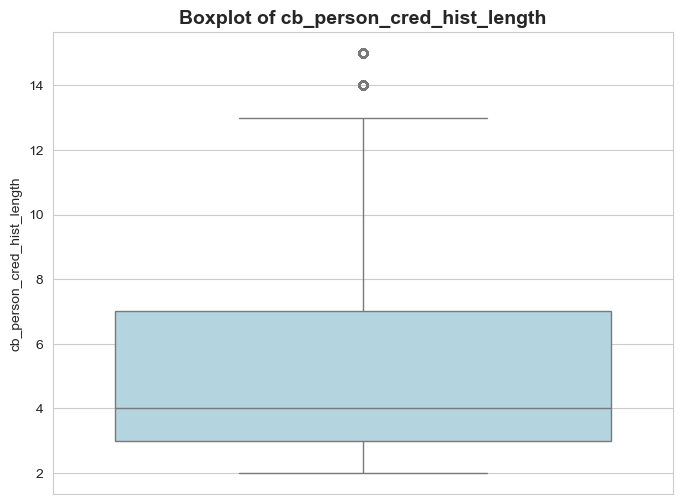

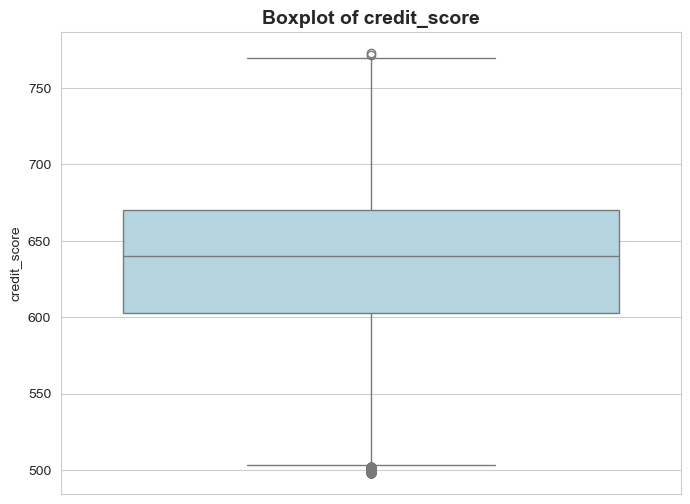

Skipping non-numeric column: previous_loan_defaults_on_file


<Figure size 800x600 with 0 Axes>

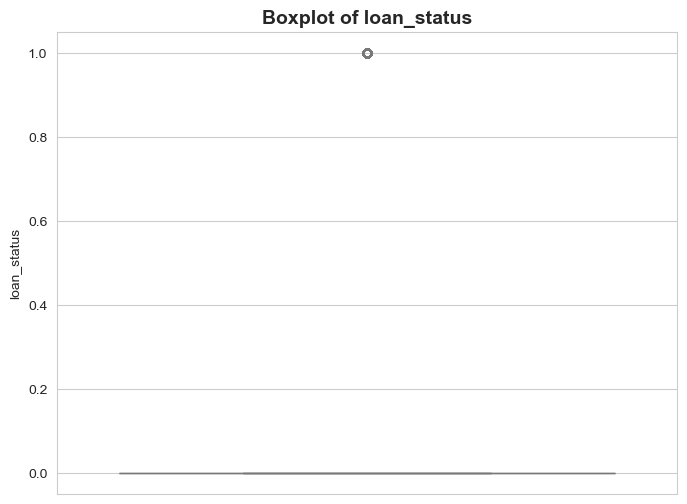

In [33]:
# identifying and handling outliars of each feature/column at once................................. 


sns.set_style("whitegrid")

# Iterate over each column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(8, 6))
    
    # Check if the column is numerical before plotting
    if df[column].dtype in ['int64', 'float64']:  
        sns.boxplot(y=df[column], color='lightblue')  # Y-axis for a better view
        plt.title(f"Boxplot of {column}", fontsize=14, fontweight="bold")
        plt.ylabel(column)
        plt.xticks([])  # Remove x-axis ticks for clarity
    
    else:
        print(f"Skipping non-numeric column: {column}")  # Skip non-numeric columns
    
    plt.show()

In [35]:
outlier_features =  ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

In [37]:
for feature in outlier_features:
    Q1 = df[feature].quantile(0.25)  # First quartile
    Q3 = df[feature].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    median = df[feature].median()
    
    # Replace values outside the whiskers with the median
    df[feature] = df[feature].apply(lambda x: median if x > upper_whisker or x < lower_whisker else x)

In [39]:
outliers = df[(df[feature] < lower_whisker) | (df[feature] > upper_whisker)]
print(f"{feature}: {len(outliers)} outliers")

credit_score: 0 outliers


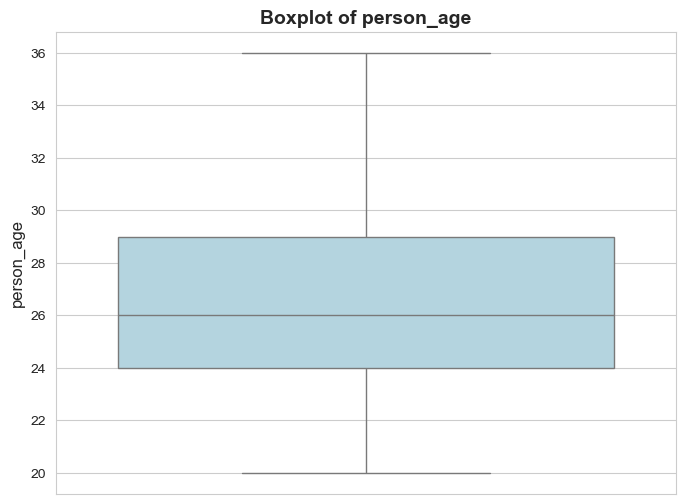

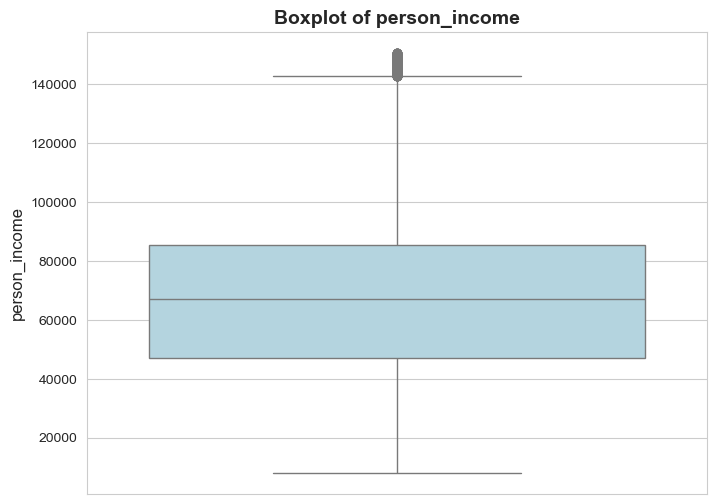

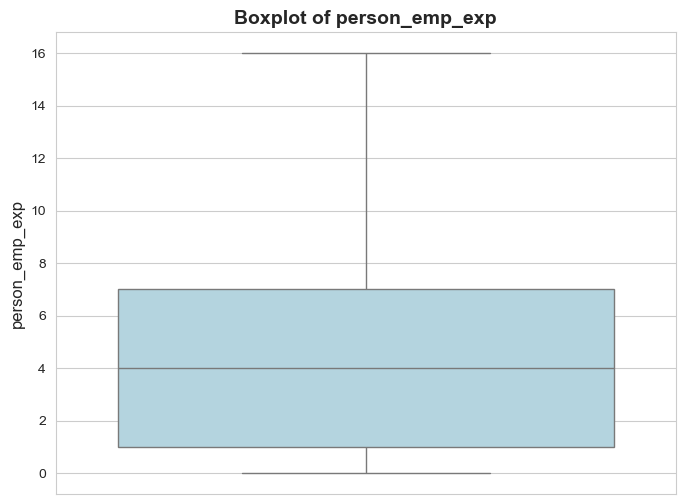

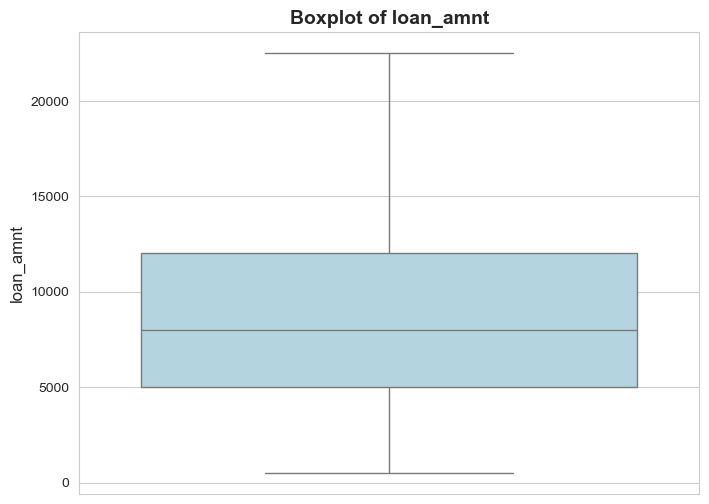

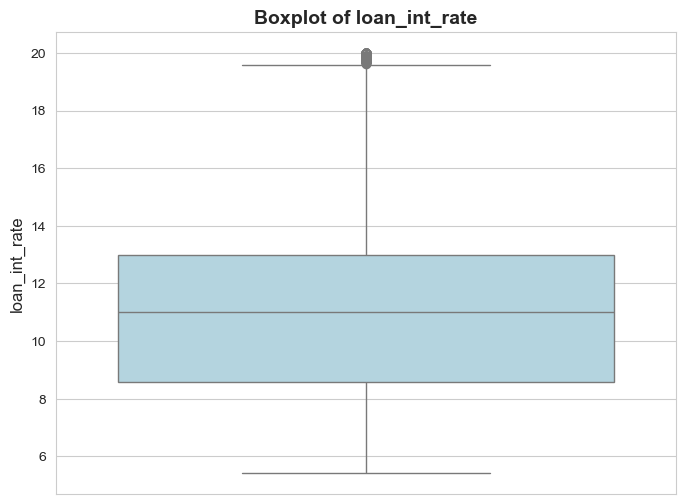

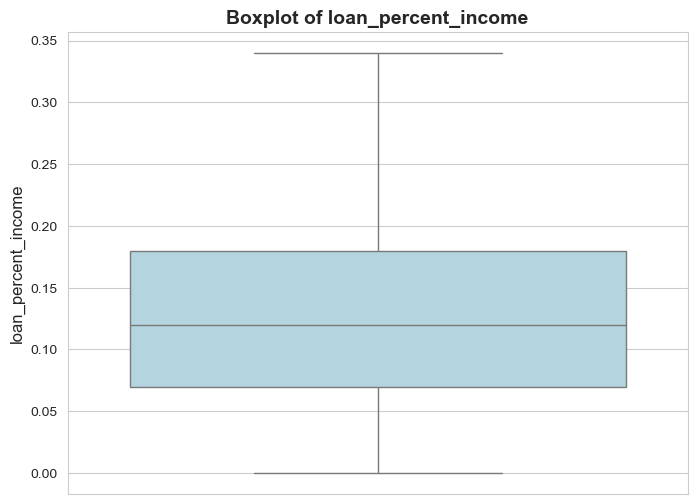

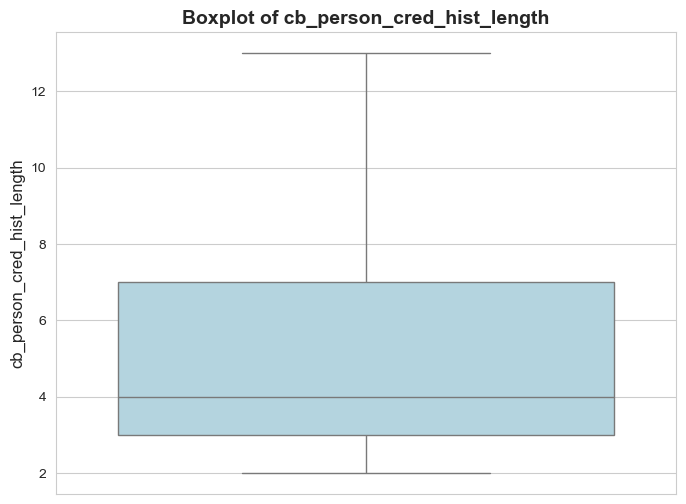

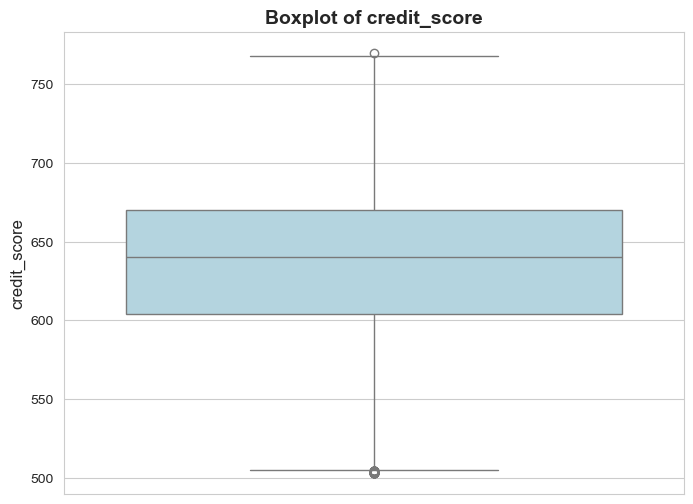

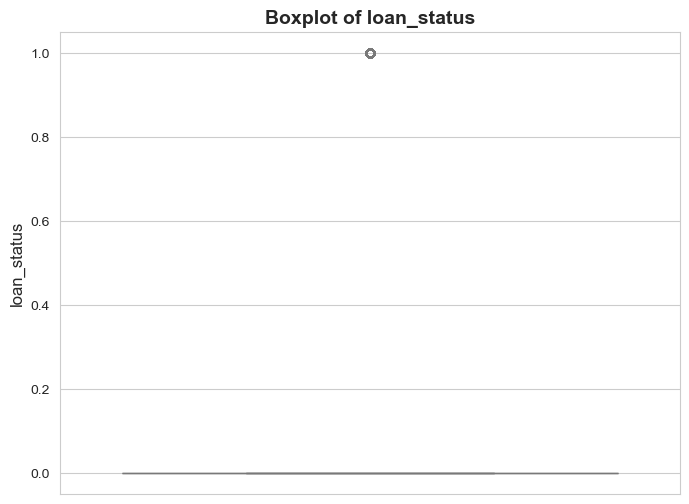

In [41]:
# Set Seaborn style
sns.set_style("whitegrid")

# Loop through each numerical column in df
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    
    # Create a vertical boxplot for better visibility
    sns.boxplot(y=df[column], color='lightblue')
    
    # Add title and labels
    plt.title(f"Boxplot of {column}", fontsize=14, fontweight="bold")
    plt.ylabel(column, fontsize=12)
    
    # Remove x-axis ticks (not needed for a single boxplot)
    plt.xticks([])
    
    # Show the plot
    plt.show()

In [43]:
# now we will move to traning and testing...

In [45]:
X = df.drop(columns=['loan_status'])
y = df[['loan_status']]

In [47]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
model = LogisticRegression()

In [53]:
model.fit(X_train,y_train)

LogisticRegression()

In [55]:
model.coef_

array([[ 0.35279948,  0.04100431,  0.05513219, -2.95705423, -0.1786141 ,
         0.7390335 ,  0.18905707, -0.71854832,  4.46978873,  2.80282927,
        -0.13993486, -2.13725683, -7.66629901]])

In [57]:
model.intercept_

array([-1.3767608])

In [59]:
# Evaluate Model Performance

model.score(X_test, y_test)

0.8815555555555555

In [61]:
y_test

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [63]:
y_predict = model.predict(X_test)

In [65]:
y_predict

array([1., 1., 0., ..., 0., 0., 0.])

In [67]:
probabilities = model.predict_proba(X_test)

In [69]:
probabilities

array([[2.40820405e-01, 7.59179595e-01],
       [4.40944655e-01, 5.59055345e-01],
       [9.73343674e-01, 2.66563261e-02],
       ...,
       [9.41686222e-01, 5.83137777e-02],
       [9.99950745e-01, 4.92554491e-05],
       [9.99926715e-01, 7.32846907e-05]])

In [71]:
report  = classification_report(y_test, y_predict)

In [75]:
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      7011
         1.0       0.74      0.72      0.73      1989

    accuracy                           0.88      9000
   macro avg       0.83      0.83      0.83      9000
weighted avg       0.88      0.88      0.88      9000



In [77]:
confusion_matrix(y_test, y_predict)

array([[6494,  517],
       [ 549, 1440]], dtype=int64)

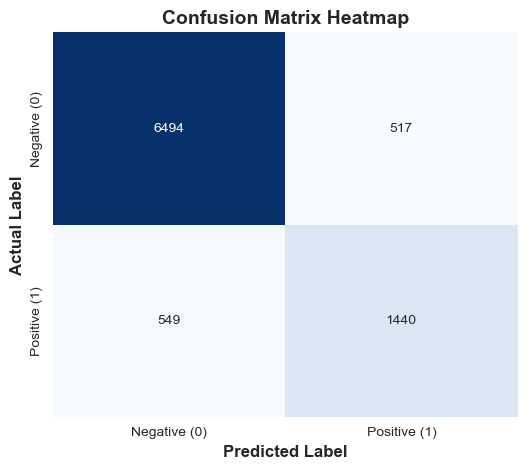

In [79]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_predict)

# Create Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative (0)', 'Positive (1)'], 
            yticklabels=['Negative (0)', 'Positive (1)'])

# Labels and Title
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix Heatmap', fontsize=14, fontweight='bold')

# Show the Plot
plt.show()

In [81]:
Accuracy = (6506+1446)/(6506+1446+505+543) # formula of accuracy
print(f'Accuracy : {Accuracy}')

Accuracy : 0.8835555555555555


In [83]:
# Percision of Class 0
precision_0 = 6506/(6506+505)
print(f'Precision of Class 0 : {precision_0}')

Precision of Class 0 : 0.9279703323349023


In [87]:
# Percision of class 1
precision_1 = 1446/(1446+505)
print(f'Precision of Class 0 : {precision_1}')


Precision of Class 0 : 0.7411583803177858


In [89]:
# Recall of Class 0
Recall_0 = 6506/(6506+543)
print(f'Recall of Class 0 : {Recall_0}')

Recall of Class 0 : 0.9229677968506171


In [91]:
# Recall of Class 1
Recall_1 = 1446/(1446+543)
print(f'Recall of Class 0 : {Recall_1}')

Recall of Class 0 : 0.726998491704374
